# EDA

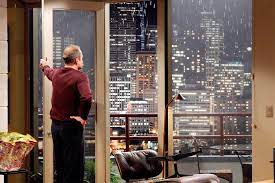

In [119]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [120]:
df = pd.read_csv("data/eda.csv")  # 파일명에 따라 'eda.csv' 또는 'king_county_cleaned.csv'일 수도 있어요
df.head()

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price
0,1,7129300520,98178,3.000,1.000,1.000,1180.000,5650.000,1955,7,2014-10-13,221900.000
1,2,6414100192,98125,3.000,2.250,2.000,2570.000,7242.000,1951,7,2014-12-09,538000.000
2,3,5631500400,98028,2.000,1.000,1.000,770.000,10000.000,1933,6,2015-02-25,180000.000
3,4,2487200875,98136,4.000,3.000,1.000,1960.000,5000.000,1965,7,2014-12-09,604000.000
4,5,1954400510,98074,3.000,2.000,1.000,1680.000,8080.000,1987,8,2015-02-18,510000.000


In [152]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   house_id        21597 non-null  int64         
 2   zipcode         21597 non-null  int64         
 3   bedrooms        21597 non-null  int64         
 4   bathrooms       21597 non-null  float64       
 5   floors          21597 non-null  float64       
 6   sqft_living     21597 non-null  int64         
 7   sqft_lot        21597 non-null  int64         
 8   yr_built        21597 non-null  int64         
 9   grade           21597 non-null  int64         
 10  sold_date       21597 non-null  datetime64[ns]
 11  price           21597 non-null  int64         
 12  price_per_sqft  21597 non-null  float64       
 13  location_type   21597 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(9), object(1)


In [122]:
df.describe()
# std 평균을 중심으로 값이 클수록 평균으로부터 더 멀리 퍼져 있다는 뜻이에요.
# sold date는 string 이여서 빠짐. 

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,10799.000,4580474287.771,98077.952,3.373,2.116,1.494,2080.322,15099.409,1971.000,7.658,540296.574
std,6234.661,2876735715.748,53.513,0.926,0.769,0.540,918.106,41412.637,29.375,1.173,367368.140
min,1.000,1000102.000,98001.000,1.000,0.500,1.000,370.000,520.000,1900.000,3.000,78000.000
25%,5400.000,2123049175.000,98033.000,3.000,1.750,1.000,1430.000,5040.000,1951.000,7.000,322000.000
50%,10799.000,3904930410.000,98065.000,3.000,2.250,1.500,1910.000,7618.000,1975.000,7.000,450000.000
75%,16198.000,7308900490.000,98118.000,4.000,2.500,2.000,2550.000,10685.000,1997.000,8.000,645000.000
max,21597.000,9900000190.000,98199.000,33.000,8.000,3.500,13540.000,1651359.000,2015.000,13.000,7700000.000


In [123]:
df.isna().sum()

id             0
house_id       0
zipcode        0
bedrooms       0
bathrooms      0
floors         0
sqft_living    0
sqft_lot       0
yr_built       0
grade          0
sold_date      0
price          0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

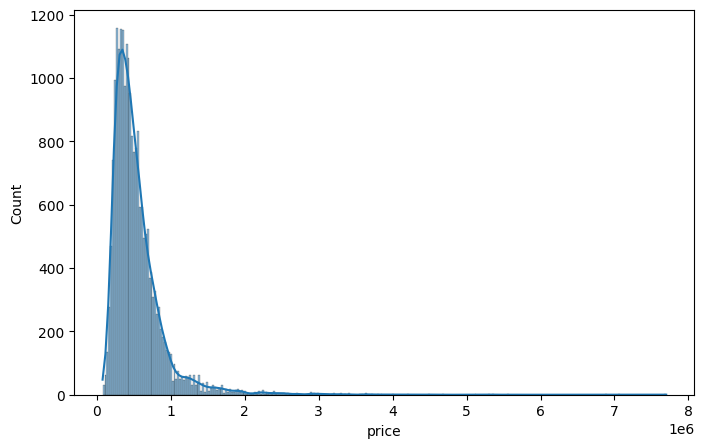

In [124]:
# 가격 분포
sns.histplot(df['price'], kde=True)

<Axes: xlabel='sqft_living', ylabel='price'>

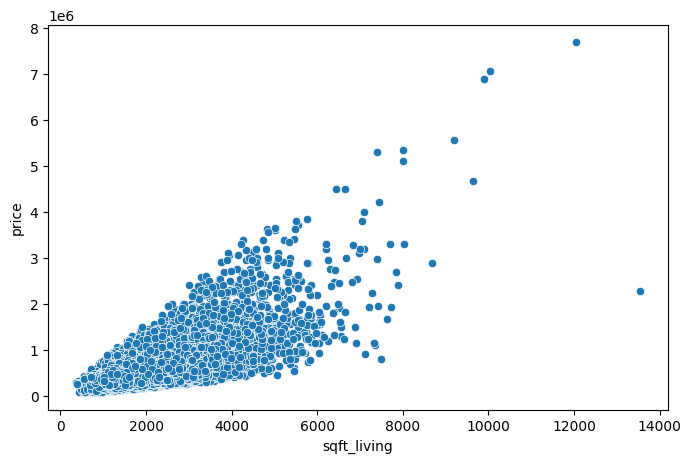

In [125]:
# 평수 vs 가격
sns.scatterplot(x='sqft_living', y='price', data=df)


```
✅ 1. matplotlib의 자동 숫자 축약 표기 규칙
matplotlib은 Y축 숫자가 너무 크면 자동으로 단위를 축약해서 표현합니다.
축약된 단위는 지수 표기법 (scientific notation) 으로 표시돼요:

표기	실제 의미
1e3	천 단위 (1,000)
1e6	백만 단위 (1,000,000)
1e7	천만 단위 (10,000,000)

그래서 Y축에 1e6이 뜬다면,
Y축 숫자들은 실제로 백만 단위로 표현되고 있다는 뜻입니다.

✅ 2. 숫자 크기로 직접 확인하기
python
복사
편집
zipcode_price.max()

그냥 모르겠으면 단위들 곱하면됨. 0.5 X 1,000,000


```

In [165]:
df.isna().sum()

id                0
house_id          0
zipcode           0
bedrooms          0
bathrooms         0
floors            0
sqft_living       0
sqft_lot          0
yr_built          0
grade             0
sold_date         0
price             0
price_per_sqft    0
location_type     0
dtype: int64

In [166]:
df["price_per_sqft"] = round(df["price"] / df["sqft_living"], 2)

In [167]:
df

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price,price_per_sqft,location_type
0,1,7129300520,98178,3,1.000,1.000,1180,5650,1955,7,2014-10-13,221900,188.050,City
1,2,6414100192,98125,3,2.250,2.000,2570,7242,1951,7,2014-12-09,538000,209.340,City
2,3,5631500400,98028,2,1.000,1.000,770,10000,1933,6,2015-02-25,180000,233.770,Suburb
3,4,2487200875,98136,4,3.000,1.000,1960,5000,1965,7,2014-12-09,604000,308.160,City
4,5,1954400510,98074,3,2.000,1.000,1680,8080,1987,8,2015-02-18,510000,303.570,Suburb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,263000018,98103,3,2.500,3.000,1530,1131,2009,8,2014-05-21,360000,235.290,City
21593,21594,6600060120,98146,4,2.500,2.000,2310,5813,2014,8,2015-02-23,400000,173.160,City
21594,21595,1523300141,98144,2,0.750,2.000,1020,1350,2009,7,2014-06-23,402101,394.220,City
21595,21596,291310100,98027,3,2.500,2.000,1600,2388,2004,8,2015-01-16,400000,250.000,Suburb


## zipcode로 location_type 컬럼 만들기 ##

In [170]:
def classify_location(zipcode):
    if zipcode in [98039, 98004, 98040]:  # Medina, Bellevue, Mercer Island
        return "Premium Spot"
    elif zipcode in [98101, 98102, 98103, 98105, 98109, 98115, 98122]:  # Seattle core
        return "City"
    elif zipcode in [98125, 98133, 98146, 98117]:  # North Seattle / West Seattle
        return "Close to Suburb"
    elif zipcode in [98005, 98011, 98052, 98034, 98033, 98074, 98075]:  # Bellevue/Kirkland/Redmond
        return "Suburb Close to City"
    elif zipcode in [98023, 98031, 98042, 98058, 98059, 98092, 98030, 98002]:  # Kent, Auburn, Federal Way
        return "Suburb"
    elif zipcode in [98070, 98014, 98019, 98024, 98045, 98051, 98022]:  # Vashon, Snoqualmie
        return "Rural"
    else:
        return "Other"


df["location_type"] = df["zipcode"].apply(zip_to_region)

In [171]:
df

,id,house_id,zipcode,bedrooms,bathrooms,floors,sqft_living,sqft_lot,yr_built,grade,sold_date,price,price_per_sqft,location_type
0,1,7129300520,98178,3,1.000,1.000,1180,5650,1955,7,2014-10-13,221900,188.050,City
1,2,6414100192,98125,3,2.250,2.000,2570,7242,1951,7,2014-12-09,538000,209.340,City
2,3,5631500400,98028,2,1.000,1.000,770,10000,1933,6,2015-02-25,180000,233.770,Suburb
3,4,2487200875,98136,4,3.000,1.000,1960,5000,1965,7,2014-12-09,604000,308.160,City
4,5,1954400510,98074,3,2.000,1.000,1680,8080,1987,8,2015-02-18,510000,303.570,Suburb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,263000018,98103,3,2.500,3.000,1530,1131,2009,8,2014-05-21,360000,235.290,City
21593,21594,6600060120,98146,4,2.500,2.000,2310,5813,2014,8,2015-02-23,400000,173.160,City
21594,21595,1523300141,98144,2,0.750,2.000,1020,1350,2009,7,2014-06-23,402101,394.220,City
21595,21596,291310100,98027,3,2.500,2.000,1600,2388,2004,8,2015-01-16,400000,250.000,Suburb


## 실제 도심 가격이 비싼지 체크 -> 맞음 

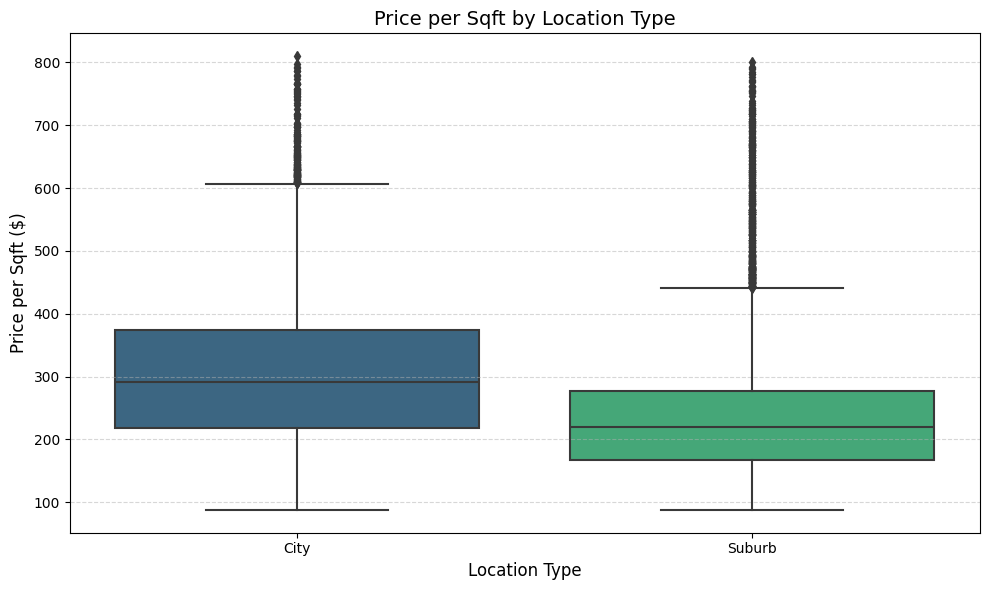

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="location_type", y="price_per_sqft", palette="viridis")

plt.title("Price per Sqft by Location Type", fontsize=14)
plt.xlabel("Location Type", fontsize=12)
plt.ylabel("Price per Sqft ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

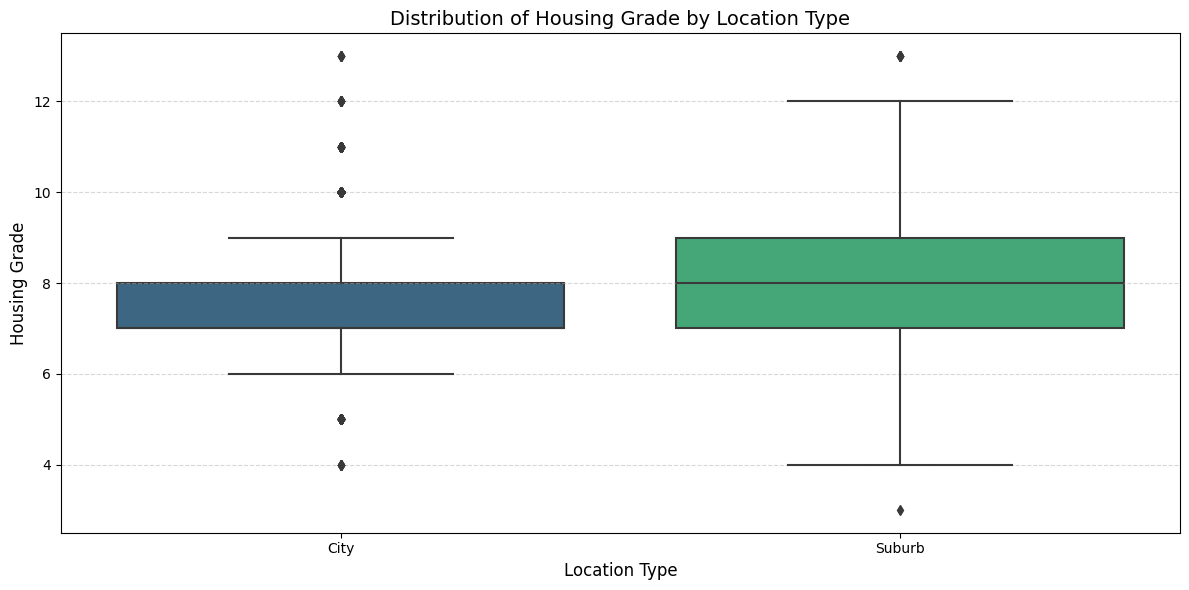

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="location_type", y="grade", data=df, palette="viridis")

plt.title("Distribution of Housing Grade by Location Type", fontsize=14)
plt.xlabel("Location Type", fontsize=12)
plt.ylabel("Housing Grade", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


내가 위와 아래에서 알고싶은건 grade가 대체 뭔지? city/suburb/고급지역에 있는건지? 아니면 비싼저택을 의미하는건지? 

## 등급은 주택의 가격에 비례한다!!! ##
"주택 등급(grade)은 가격을 잘 설명하는 유의미한 변수이다."
특히 grade가 높아질수록 주택 가격도 뚜렷하게 상승한다.

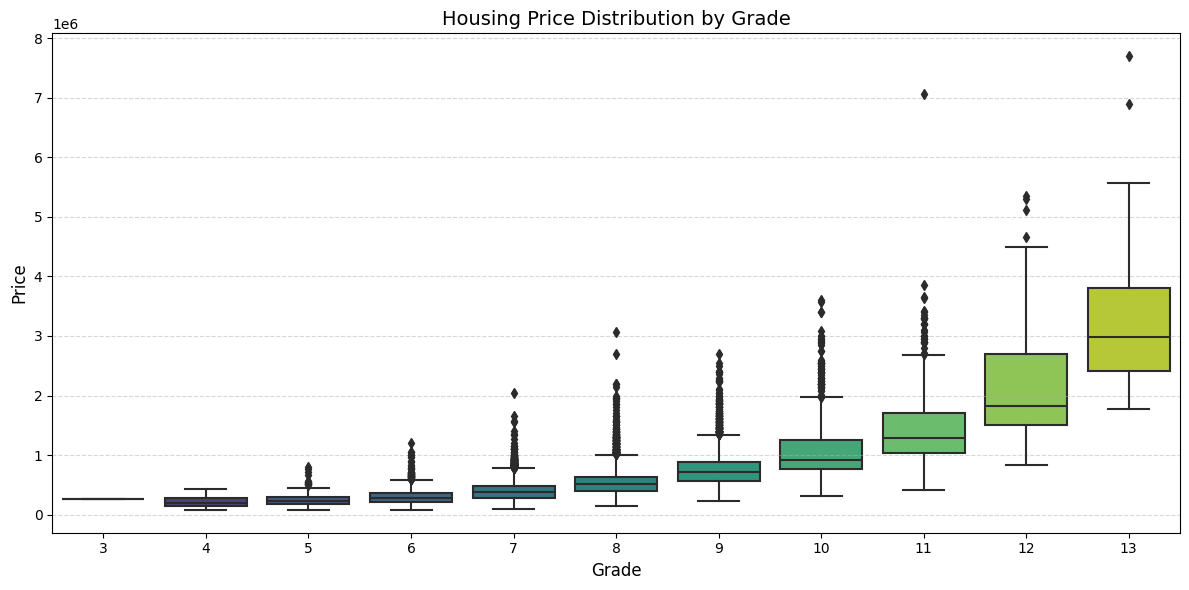

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x="grade", y="price", data=df, palette="viridis")

plt.title("Housing Price Distribution by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 데이터 클리닝 ##

In [133]:
df.dtypes

id                  int64
house_id            int64
zipcode             int64
bedrooms          float64
bathrooms         float64
floors            float64
sqft_living       float64
sqft_lot          float64
yr_built            int64
grade               int64
sold_date          object
price             float64
price_per_sqft    float64
location_type      object
dtype: object

In [134]:
df.columns

Index(['id', 'house_id', 'zipcode', 'bedrooms', 'bathrooms', 'floors',
       'sqft_living', 'sqft_lot', 'yr_built', 'grade', 'sold_date', 'price',
       'price_per_sqft', 'location_type'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   house_id        21597 non-null  int64  
 2   zipcode         21597 non-null  int64  
 3   bedrooms        21597 non-null  float64
 4   bathrooms       21597 non-null  float64
 5   floors          21597 non-null  float64
 6   sqft_living     21597 non-null  float64
 7   sqft_lot        21597 non-null  float64
 8   yr_built        21597 non-null  int64  
 9   grade           21597 non-null  int64  
 10  sold_date       21597 non-null  object 
 11  price           21597 non-null  float64
 12  price_per_sqft  21597 non-null  float64
 13  location_type   21597 non-null  object 
dtypes: float64(7), int64(5), object(2)
memory usage: 2.3+ MB


Fix column names formats -> no need
df.duplicated().value_counts() -> no need 


In [142]:
df["sold_date"] = pd.to_datetime(df["sold_date"], format="%Y-%m-%d")

## 쓸데없는 소수점은 지우자 ##

In [148]:
cols_to_round = ["price", "sqft_living", "sqft_lot", "bedrooms"]

for col in cols_to_round:
    df[col] = df[col].round(0).astype(int)